INTRODUCTION ABOUT ALL THE FEATURES


age: Age of the patient.

sex: Gender of the patient (0 = female, 1 = male).

cp: Type of chest pain experienced by the patient (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

trestbps: Resting blood pressure of the patient (in mm Hg).

chol: Serum cholesterol level of the patient (in mg/dL).

fbs: Fasting blood sugar level higher than 120 mg/dL (1 = true, 0 = false).

restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
thalach: Maximum heart rate achieved during exercise.

exang: Exercise-induced angina (1 = yes, 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

ca: Number of major vessels colored by fluoroscopy (0-3).

thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

target: Presence of heart disease (0 = no, 1 = yes).

IMPORTING ALL THE ESSENTIAL LIBRARIES

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [126]:
data = pd.read_csv("/content/heartdisease.csv")        

# Reading the csv file

In [127]:
data.head()     # First Five Rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0,Male
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0,Male
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,0.0,2,1.0,Female
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,0.0,2,1.0,Male
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,0.0,2,1.0,Female


In [128]:
data.tail()      # Last Five Rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
298,57,Female,0,140.0,241,0,1,123,1,0.2,1,0.0,3,0.0,Female
299,45,Male,3,110.0,264,0,1,132,0,1.2,1,0.0,3,0.0,Male
300,68,Male,0,144.0,193,1,1,141,0,3.4,1,2.0,3,0.0,Male
301,57,Male,0,130.0,131,0,1,115,1,1.2,1,1.0,3,0.0,Male
302,57,Female,1,130.0,236,0,0,174,0,0.0,1,1.0,2,0.0,Female


In [129]:
data.shape       # Gives the no of Rows and Columns in the dataset

(303, 15)

In [130]:
data.dtypes      # Gives the Datatype of particular column

age             object
sex             object
cp              object
trestbps       float64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca             float64
thal             int64
target         float64
Unnamed: 14     object
dtype: object

In [131]:
data.info()      # Gives the Datatype aswell as null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    object 
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: float64(4), int64(7), object(4)
memory usage: 35.6+ KB


In [132]:
data.describe()   # Gives the statistical values of the dataset (we can even include categorical values using include = 'ALL' but that doesnot make sense)

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,140.000000,303.000000,301.000000
mean,131.556291,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.914286,2.313531,0.548173
std,17.527818,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.121957,0.612277,0.498503
min,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000,3.000000,1.000000
max,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [133]:
data.duplicated().sum()   # To check how many records are duplicated

1

In [134]:
duplicate = data[data.duplicated()]
print("This is the duplicate record present in the Dataset")     # to check which row is Duplicated
duplicate

This is the duplicate record present in the Dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
164,38,Male,2,138.0,175,0,1,173,0,0.0,2,4.0,2,1.0,Male


<Axes: >

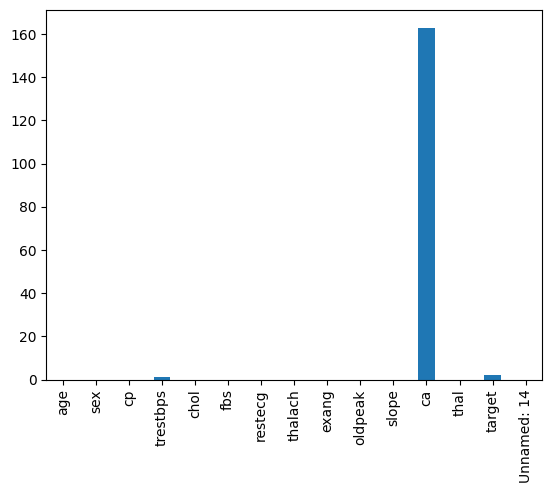

In [135]:
data.isnull().sum().plot(kind='bar')

In [136]:
data['ca'].value_counts()

0.0    71
1.0    29
2.0    25
3.0    11
4.0     4
Name: ca, dtype: int64

In [137]:
column_name = 'ca'
null_count = data[column_name].isnull().sum()
total_count = len(data)
null_percentage = (null_count / total_count) * 100

print(f"Null count: {null_count}")
print(f"Total count: {total_count}")
print(f"Null percentage: {null_percentage}%")

Null count: 163
Total count: 303
Null percentage: 53.79537953795379%


In [138]:
# Check correlation with the target variable
target_column = 'target'
correlation = data[[column_name, target_column]].corr()[column_name][target_column]

print(f"Correlation with target variable: {correlation}")

Correlation with target variable: -0.3137946105595254


In [139]:
'''
 A correlation of -0.31 suggests a moderate negative relationship between the variables
 So by considering moderate negative relationship and null percentage of 53.79 and that in a medical field even a small imputation change in the data can lead to impact the model.
 So I am proceeding with dropping these column.  
'''

'\n A correlation of -0.31 suggests a moderate negative relationship between the variables\n So by considering moderate negative relationship and null percentage of 53.79 and that in a medical field even a small imputation change in the data can lead to impact the model.\n So I am proceeding with dropping these column.  \n'

In [140]:
data = data.drop(columns = [column_name])

<Axes: >

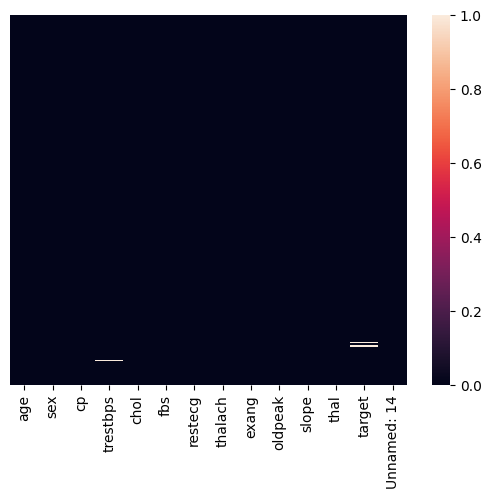

In [141]:
sns.heatmap(data.isnull(),yticklabels = False)

In [142]:
data['trestbps'].mean()

131.5562913907285

In [143]:
data['trestbps'].median()

130.0

In [144]:
data['trestbps'].mode()

0    120.0
Name: trestbps, dtype: float64

In [145]:
data['trestbps'].fillna(130.0,inplace = True)  # imputed with median value

In [146]:
data['target'].mean()

0.5481727574750831

In [147]:
data['target'].median()

1.0

In [148]:
data['target'].mode()

0    1.0
Name: target, dtype: float64

In [149]:
data['target'].fillna(1.0,inplace = True) # Replaced with median value instead of mean as mean is sensitive to outliers

<Axes: >

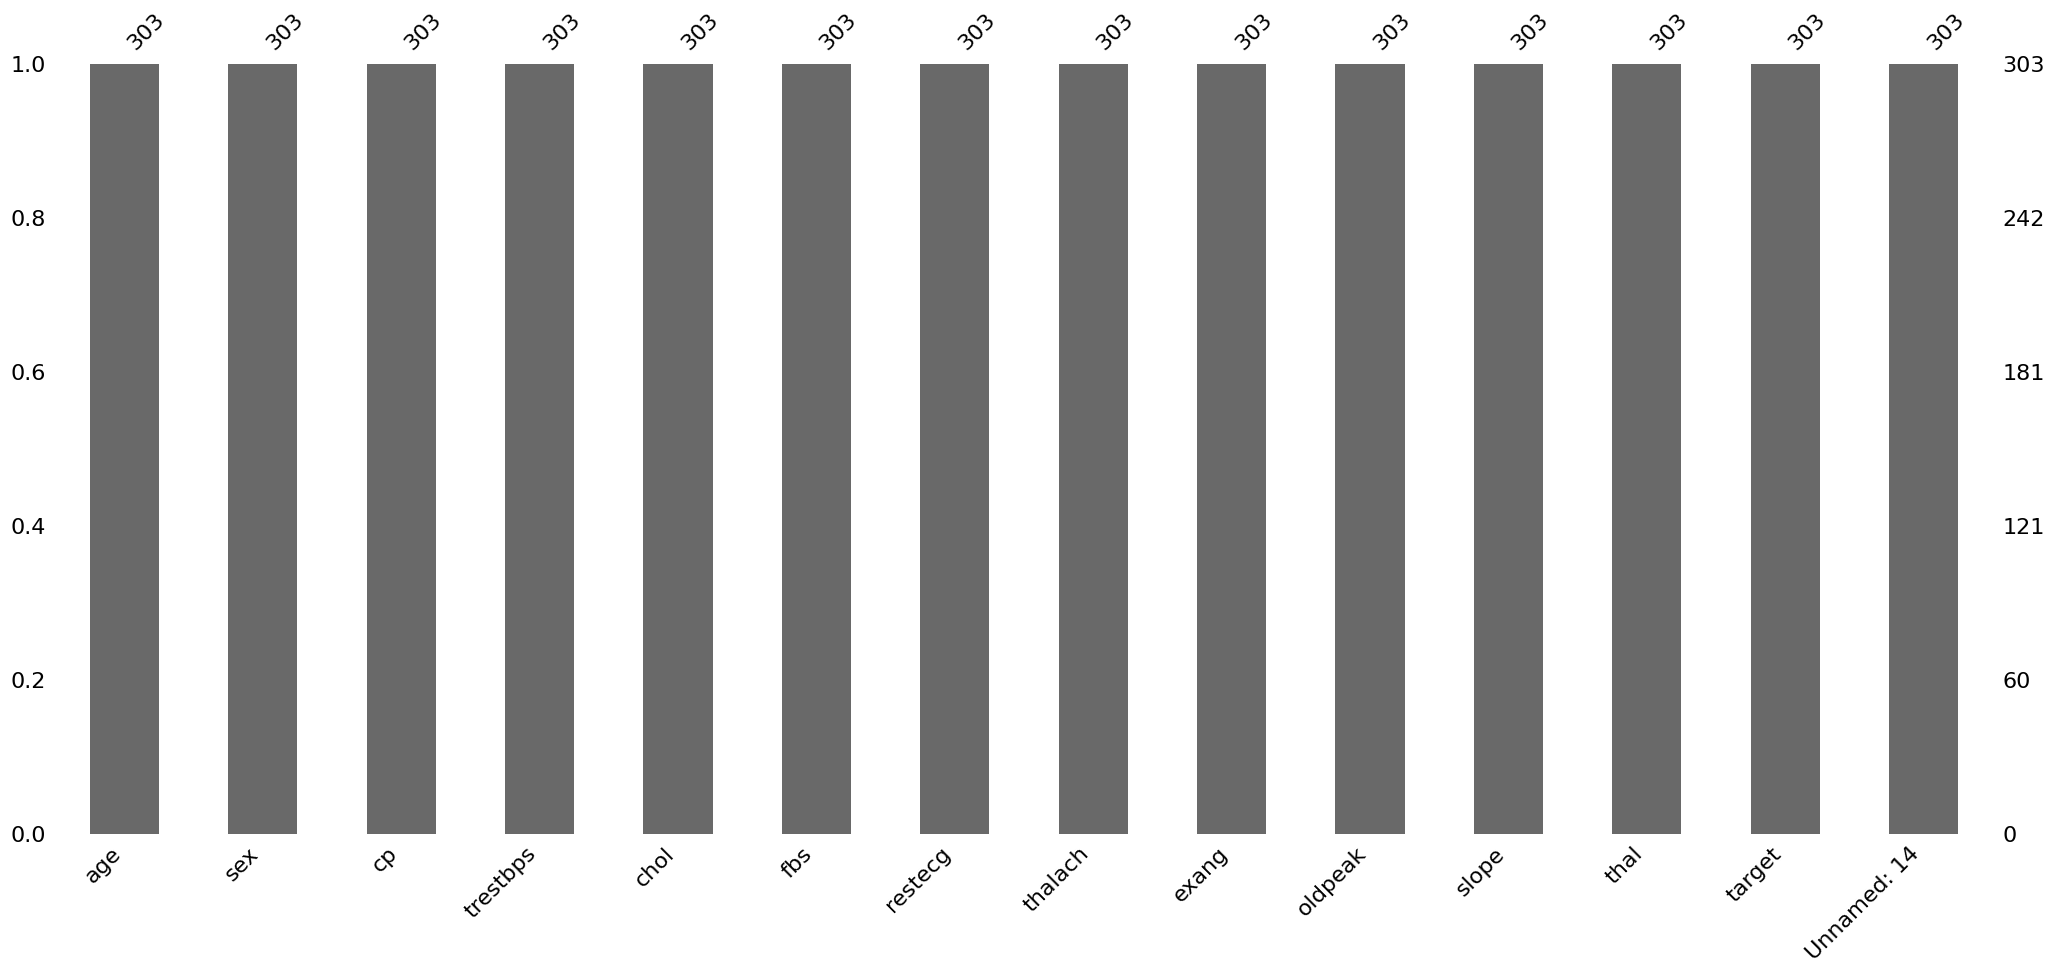

In [150]:
ms.bar(data)

In [151]:
# By checking the data (head,tail,sample etc) visually we can see that both sex and unnamed : 14 columns are having same data but for further accuracy as below

In [152]:
compare_columns = lambda x : x['sex'] == x['Unnamed: 14']
result = data.apply(compare_columns, axis = 1)
print(result)

0      True
1      True
2      True
3      True
4      True
       ... 
298    True
299    True
300    True
301    True
302    True
Length: 303, dtype: bool


In [153]:
cnt = result.value_counts()

In [154]:
print(cnt)

True    303
dtype: int64


In [155]:
# Here True = 303 and total records are also 303 so we can directly remove one of the unwanted column in the data

In [156]:
data.drop('Unnamed: 14', axis = 1, inplace = True)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    object 
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 30.9+ KB


In [158]:
data.sample(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
249,69,Male,2,140.0,254,0,0,146,0,2.0,1,3,0.0


In [159]:
# age,cp needs to be in numerical format but they are in categorical so we need to typecast them

In [160]:
data['age'] = pd.to_numeric(data['age'], errors='coerce').astype('Int64') 
data['cp'] = pd.to_numeric(data['cp'], errors='coerce').astype('Int64') 

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    Int64  
 1   sex       303 non-null    object 
 2   cp        302 non-null    Int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    float64
dtypes: Int64(2), float64(3), int64(7), object(1)
memory usage: 31.5+ KB


<Axes: xlabel='age'>

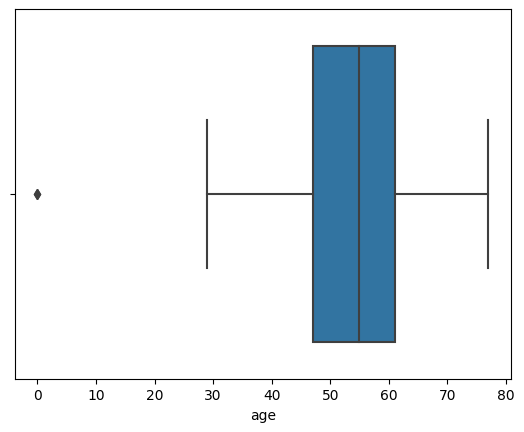

In [162]:
sns.boxplot(x = data['age'])

In [163]:
data['age'].value_counts()

58    18
57    17
54    16
59    14
52    13
51    12
56    11
44    11
60    11
62    11
41    10
64    10
67     9
63     9
43     8
42     8
61     8
55     8
45     8
53     8
46     7
66     7
48     7
50     7
65     7
47     5
39     4
35     4
49     4
68     4
70     4
69     3
71     3
40     3
38     3
0      2
37     2
34     2
29     1
74     1
76     1
77     1
Name: age, dtype: Int64

In [164]:
data['age'].mean()

53.97682119205298

In [165]:
data['age'].median()

55.0

In [166]:
data['age'].fillna(55.0,inplace = True)

In [167]:
# 0.0 value is having count of 2 values

<Axes: xlabel='cp'>

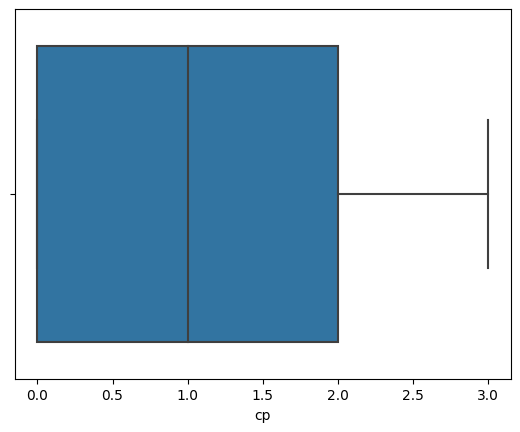

In [168]:
sns.boxplot(x = data['cp'])

In [169]:
data['cp'].value_counts()

0    143
2     87
1     49
3     23
Name: cp, dtype: Int64

In [170]:
# no outliers are detected in cp column

<Axes: xlabel='trestbps'>

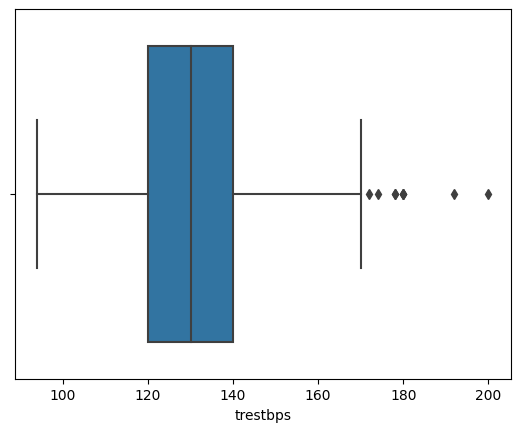

In [171]:
sns.boxplot(x = data['trestbps'])

In [172]:
# Here in this particular case outliers may be very important as those outliers' datapoints will result in disease

<Axes: xlabel='chol'>

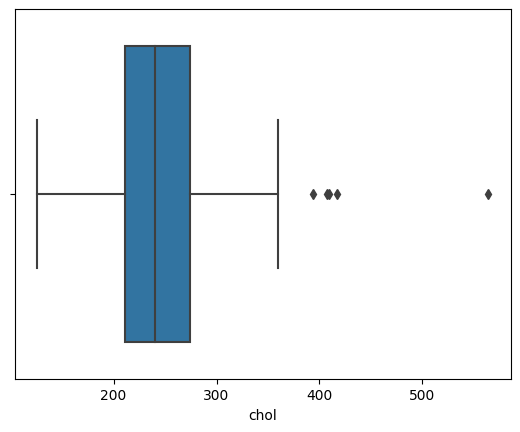

In [173]:
sns.boxplot(x = data['chol'])

In [174]:
data[data['chol'] >500].value_counts()  
# one person with 67 years old having cholestrol level of 564 which is an absolute outlier in the data
# But One in 300 to 500 people will have one gene mutation for familial hyperlipidemia. This results in total cholesterol levels between 350 and 550 mg/dl.
# so from above assumption from google data we can consider it as an real value and we need to deal with it

age  sex     cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  thal  target
67   Female  2   115.0     564   0    0        160      0      1.6      1      3     1.0       1
dtype: int64

<Axes: xlabel='fbs'>

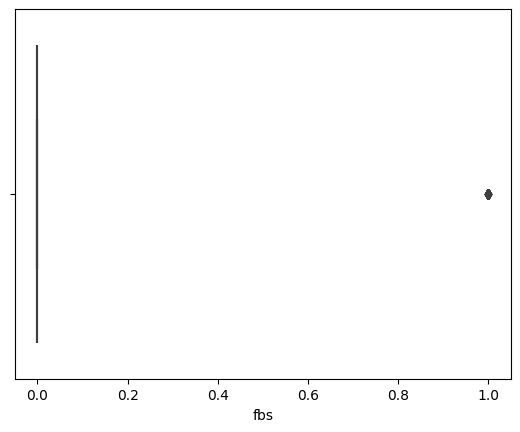

In [175]:
sns.boxplot(x = data['fbs'])

In [176]:
data['fbs'].value_counts()
# NO outliers are detected

0    258
1     45
Name: fbs, dtype: int64

<Axes: xlabel='restecg'>

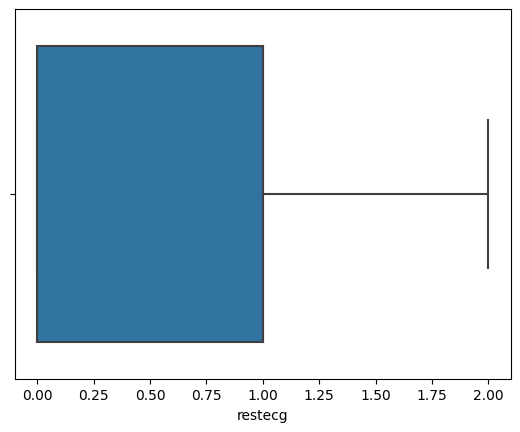

In [177]:
sns.boxplot(x = data['restecg'])

In [178]:
# restecg of 2 is not an outlier considering it as 2 = showing probable or definite left ventricular hypertrophy

In [179]:
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [180]:
data[data['restecg'] == 2]
# no outlier treatment

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
144,76,Female,2,140.0,197,0,2,116,0,1.1,1,2,1.0
266,55,Female,0,180.0,327,0,2,117,1,3.4,1,2,0.0
289,55,Female,0,128.0,205,0,2,130,1,2.0,1,3,0.0
291,58,Male,0,114.0,318,0,2,140,0,4.4,0,1,0.0


<Axes: xlabel='thalach'>

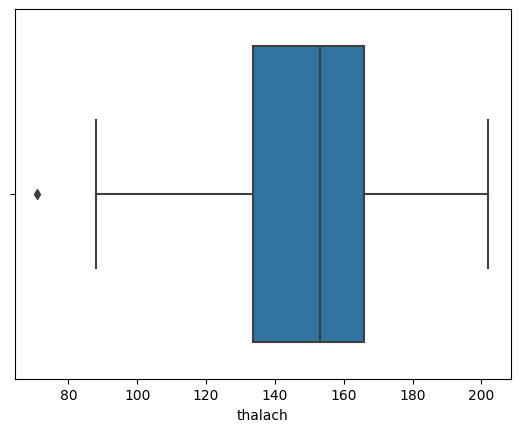

In [181]:
sns.boxplot(x = data['thalach'])

In [182]:
data[data['thalach']<90]  # having less than 90 shows target 0 so no outlier treatment

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
243,57,Male,0,152.0,274,0,1,88,1,1.2,1,3,0.0
272,67,Male,0,120.0,237,0,1,71,0,1.0,1,2,0.0


<Axes: xlabel='exang'>

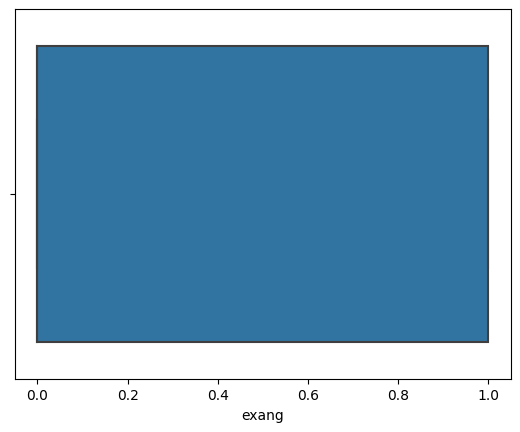

In [183]:
sns.boxplot(x = data['exang'])

In [184]:
# no outliers

<Axes: xlabel='oldpeak'>

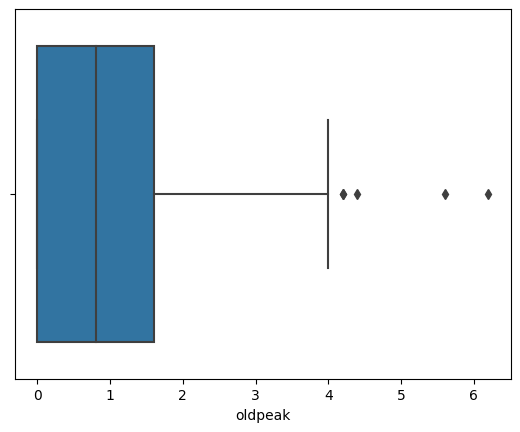

In [185]:
sns.boxplot(x = data['oldpeak'])

In [186]:
data[data['oldpeak'] > 6]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
204,62,Female,0,160.0,164,0,0,145,0,6.2,0,3,0.0


In [187]:
# considering old peak values are in normal range if they are in range of [0-6], Here assuming age,blood pressure,cholestrol,oldpeak all are in high range but target is "0",so assumption might be it is not an outlier and there is a possibility of attack in future.

<Axes: xlabel='slope'>

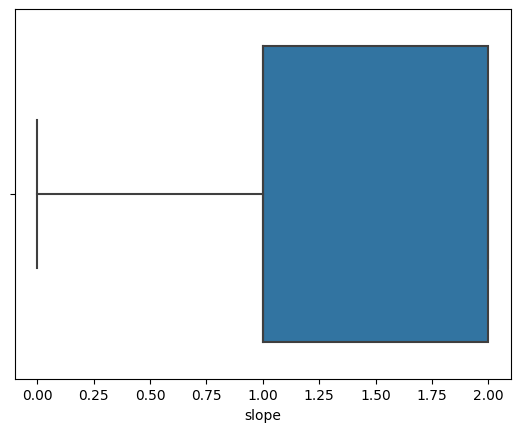

In [188]:
sns.boxplot(x = data['slope'])

In [189]:
data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [190]:
# no outliers

<Axes: xlabel='thal'>

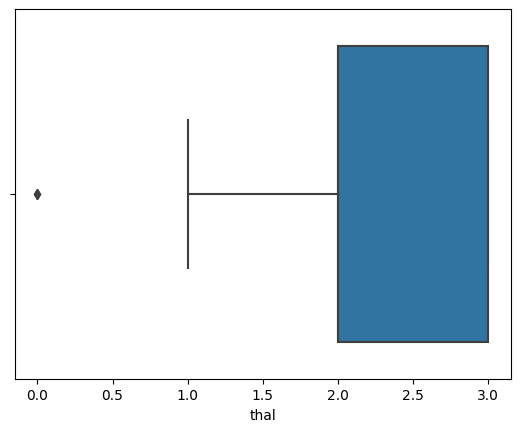

In [191]:
sns.boxplot(x = data['thal'])

In [192]:
# 1: Normal (no Thalassemia)
# 2: Fixed Defect (Thalassemia present but not reversible)
# 3: Reversible Defect (Thalassemia present and partially reversible)
# In this encoding, the "thal" variable ranges from 1 to 3, representing the different types or categories of Thalassemia. Each value corresponds to a specific condition related to Thalassemia.

In [193]:
# In the above case thal result needs to be between 1 to 3 but here we got 0 which might be an outlier or due to missing data
data[data['thal']==0] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
48,53,Female,2,128.0,216,0,0,115,0,0.0,2,0,1.0
281,52,Male,0,128.0,204,1,1,156,1,1.0,1,0,0.0


In [194]:
data['thal'].median()

2.0

In [195]:
data['thal'] = data['thal'].replace(0, 2.0) # Replacing with median value

<Axes: xlabel='target'>

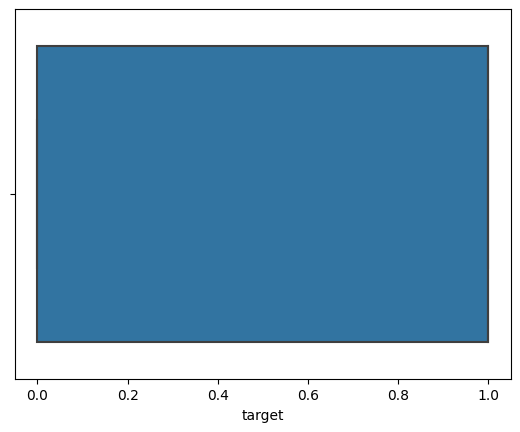

In [196]:
sns.boxplot(x = data['target'])

In [197]:
data['target'].value_counts()
# No Outliers detected

1.0    167
0.0    136
Name: target, dtype: int64

In [198]:
data['cp'].median()

1.0

In [199]:
data['cp'].fillna(1.0,inplace = True)

In [200]:
data.to_csv("ml_data.csv",index = False)

In [201]:
# creating function to convert numerical to categorical data


# age column
def age_(column):
    if column <35:
        return "Youngster"
    elif column >=35 and column <60:
        return "Middle_Aged"
    else:
        return "Senior Citizens"


# cp column
def cp_(column):
    if column == 1:
        return "Stable"
    elif column == 2:
        return "Unstable"
    elif column == 3:
        return "Microvascular"
    else:
        return "Variant"

# trestbps column
def Blood_Pressure_(column):
    if column < 120:
        return "Healthy"
    elif column >= 120 and column <= 160:
      return "Presence of BP"
    else:
        return "High BP"

# slope column
def slope_(column):
    if column == 1:
        return "Upsloping"
    elif column == 2:
        return "Flat"
    else:
        return "Downsloping"


# thall column

def thal_(column):
    if column==3:
        return "Normal"
    elif column==6:
        return "Fixed Defect"
    elif column==7:
        return "Reversable Defect"
    else:
      return "other"


# Cholestrol column

def cholestrol_(column):
    if column <130:
        return "Healthy Range"
    elif column >=130 and column <160:
        return "BorderLine"
    elif column >= 160 and column <= 200:
        return "High"
    else:
      return "Alarming Level"

# Heart_disease (tartget) column

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [202]:
data['age'] = data['age'].apply(age_)
data['cp'] = data['cp'].apply(cp_)
data['slope'] = data['slope'].apply(slope_)
data['thal'] = data['thal'].apply(thal_)
data['trestbps'] = data['trestbps'].apply(Blood_Pressure_)
data['chol'] = data['chol'].apply(cholestrol_)
data['targrt'] = data['target'].apply(heart_disease)

In [203]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target,targrt
0,Senior Citizens,Male,Microvascular,Presence of BP,Alarming Level,1,0,150,0,2.3,Downsloping,other,1.0,Presence
1,Middle_Aged,Male,Unstable,Presence of BP,Alarming Level,0,1,187,0,3.5,Downsloping,other,1.0,Presence
2,Middle_Aged,Female,Stable,Presence of BP,Alarming Level,0,0,172,0,1.4,Flat,other,1.0,Presence
3,Middle_Aged,Male,Stable,Presence of BP,Alarming Level,0,1,178,0,0.8,Flat,other,1.0,Presence
4,Middle_Aged,Female,Variant,Presence of BP,Alarming Level,0,1,163,1,0.6,Flat,other,1.0,Presence


In [204]:
data.drop('target',axis = 1,inplace = True)

In [205]:
data.rename(columns = {'targrt' : 'Heart_Disease'},inplace = True)

In [206]:
data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
thal             0
Heart_Disease    0
dtype: int64

In [207]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,Heart_Disease
0,Senior Citizens,Male,Microvascular,Presence of BP,Alarming Level,1,0,150,0,2.3,Downsloping,other,Presence
1,Middle_Aged,Male,Unstable,Presence of BP,Alarming Level,0,1,187,0,3.5,Downsloping,other,Presence
2,Middle_Aged,Female,Stable,Presence of BP,Alarming Level,0,0,172,0,1.4,Flat,other,Presence
3,Middle_Aged,Male,Stable,Presence of BP,Alarming Level,0,1,178,0,0.8,Flat,other,Presence
4,Middle_Aged,Female,Variant,Presence of BP,Alarming Level,0,1,163,1,0.6,Flat,other,Presence


In [208]:
# After cleaning the dataset (null values and outliers treatment and numerical to categorical) now the dataset is ready for further analysis in SQL and Power BI

In [209]:
data.to_csv("num_to_cat_heart_data.csv",index = False)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    object 
 1   sex            303 non-null    object 
 2   cp             303 non-null    object 
 3   trestbps       303 non-null    object 
 4   chol           303 non-null    object 
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    object 
 11  thal           303 non-null    object 
 12  Heart_Disease  303 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 30.9+ KB


In [211]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,Heart_Disease
0,Senior Citizens,Male,Microvascular,Presence of BP,Alarming Level,1,0,150,0,2.3,Downsloping,other,Presence
1,Middle_Aged,Male,Unstable,Presence of BP,Alarming Level,0,1,187,0,3.5,Downsloping,other,Presence


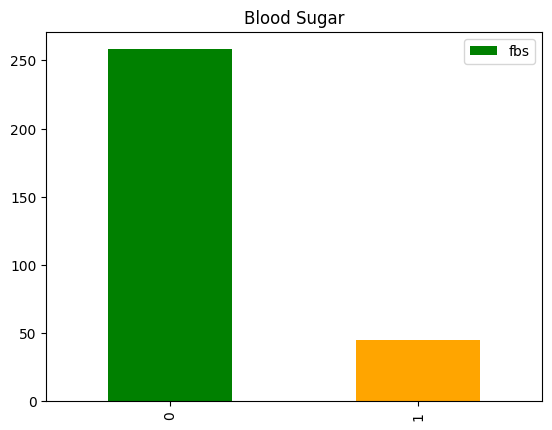

In [212]:
data.fbs.value_counts().plot(kind='bar', legend=True, title="Blood Sugar", color=["green","orange","blue","red"])
plt.show()
     

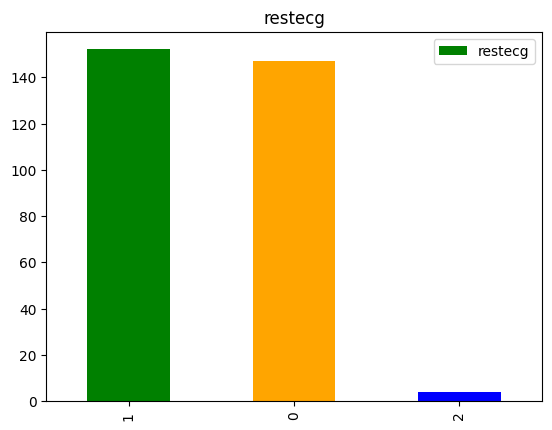

In [213]:
data.restecg.value_counts().plot(kind='bar', legend=True, title="restecg", color=["green","orange","blue","red"])
plt.show()

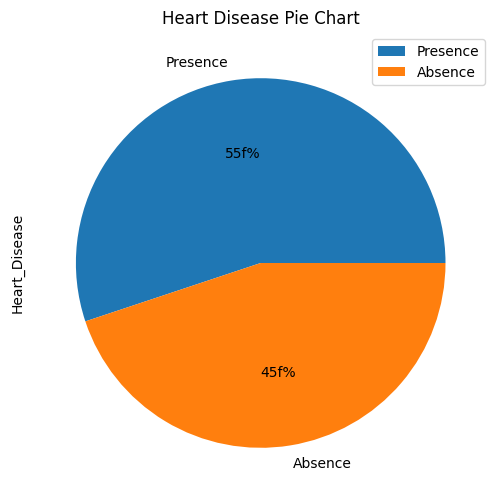

In [214]:
data.Heart_Disease.value_counts().plot(kind="pie", autopct="%1.0ff%%", legend=True, title="Heart Disease Pie Chart", figsize=(7,6))
plt.show()

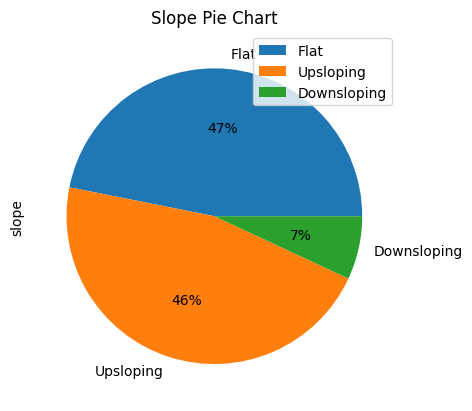

In [215]:
data.slope.value_counts().plot(kind="pie", autopct="%1.0f%%",legend=True,title="Slope Pie Chart")
plt.show()

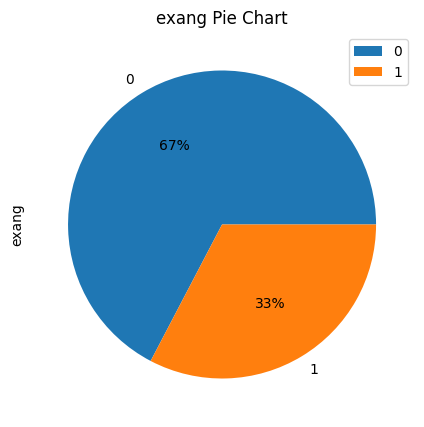

In [216]:
data.exang.value_counts().plot(kind="pie", autopct="%1.0f%%", legend=True,figsize=(7,5), title="exang Pie Chart")
plt.show()

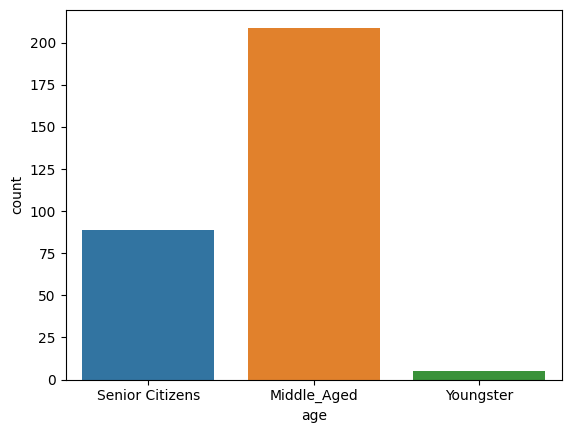

In [217]:
sns.countplot(x=data.age)
plt.show()

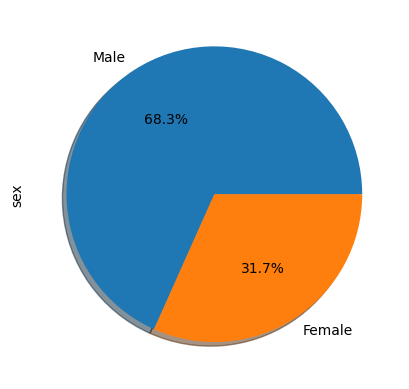

In [218]:
data.sex.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.show()

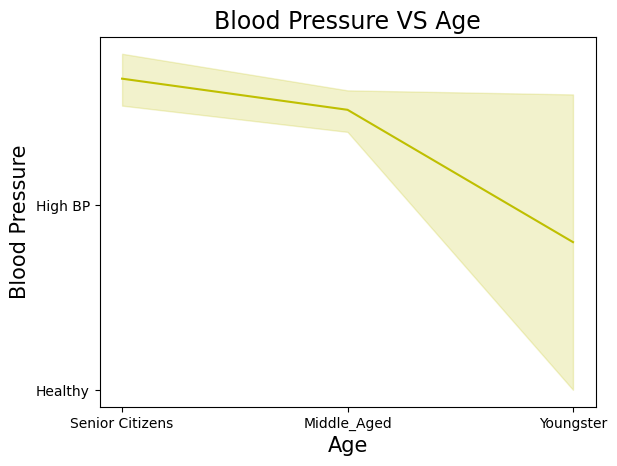

In [219]:
sns.lineplot(x='age', y='trestbps', data=data, color='y')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()
     

In [220]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,Heart_Disease
0,Senior Citizens,Male,Microvascular,Presence of BP,Alarming Level,1,0,150,0,2.3,Downsloping,other,Presence
1,Middle_Aged,Male,Unstable,Presence of BP,Alarming Level,0,1,187,0,3.5,Downsloping,other,Presence
2,Middle_Aged,Female,Stable,Presence of BP,Alarming Level,0,0,172,0,1.4,Flat,other,Presence
3,Middle_Aged,Male,Stable,Presence of BP,Alarming Level,0,1,178,0,0.8,Flat,other,Presence
4,Middle_Aged,Female,Variant,Presence of BP,Alarming Level,0,1,163,1,0.6,Flat,other,Presence


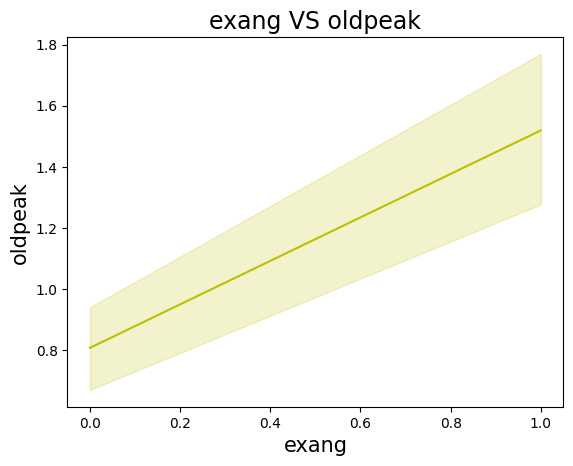

In [221]:
sns.lineplot(x='exang', y='oldpeak', data=data, color='y')
plt.title('exang VS oldpeak', fontsize=17)
plt.xlabel('exang', fontsize=15)
plt.ylabel('oldpeak', fontsize=15)
plt.show()

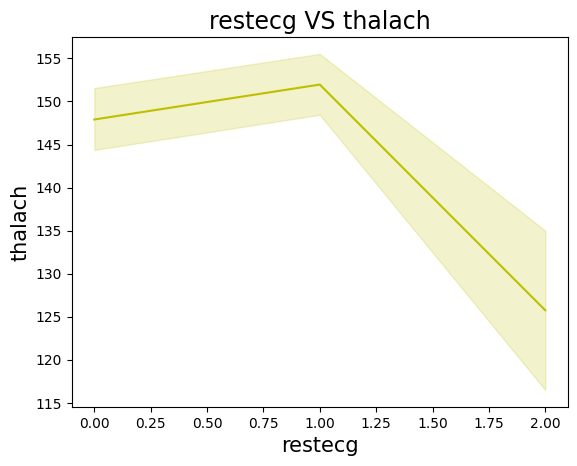

In [222]:
sns.lineplot(x='restecg', y='thalach', data=data, color='y')
plt.title('restecg VS thalach', fontsize=17)
plt.xlabel('restecg', fontsize=15)
plt.ylabel('thalach', fontsize=15)
plt.show()

In [223]:
ml_data = pd.read_csv("/content/heartdisease.csv")

In [224]:
ml_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0,Male
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0,Male
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,0.0,2,1.0,Female
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,0.0,2,1.0,Male
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,0.0,2,1.0,Female


In [225]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    object 
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: float64(4), int64(7), object(4)
memory usage: 35.6+ KB


In [226]:
# as we have seen that we are aldready treated outliers similarly we need to do outlier treatment only for age and thal

In [227]:
ml_data['age'] = pd.to_numeric(ml_data['age'], errors='coerce').astype('Int64') 
ml_data['cp'] = pd.to_numeric(ml_data['cp'], errors='coerce').astype('Int64')

In [228]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          302 non-null    Int64  
 1   sex          303 non-null    object 
 2   cp           302 non-null    Int64  
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: Int64(2), float64(4), int64(7), object(2)
memory usage: 36.2+ KB


In [229]:
ml_data['age'].median()

55.0

In [305]:
ml_data['age'] = ml_data['age'].replace({0 : 55})   # OUTLIER

In [231]:
ml_data['thal'].median()

2.0

In [306]:
ml_data['thal'] = ml_data['thal'].replace({0 : 2})    # OUTLIER

In [233]:
ml_data.drop(columns = ['Unnamed: 14'],axis = 1,inplace = True)

In [234]:
ml_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,0.0,2,1.0
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,0.0,2,1.0
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,0.0,2,1.0


In [307]:
ml_data.drop(columns = ['ca'],inplace = True)  # column is having more than 50 percent of missing values

KeyError: ignored

In [236]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    Int64  
 1   sex       303 non-null    object 
 2   cp        302 non-null    Int64  
 3   trestbps  302 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    301 non-null    float64
dtypes: Int64(2), float64(3), int64(7), object(1)
memory usage: 31.5+ KB


In [243]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# Define the columns for imputation, encoding, and scaling
numerical_columns = ['age', 'cp', 'trestbps', 'target']
categorical_columns = ['sex']
target_column = ['target']

# Create transformers for imputation, encoding, and scaling
numerical_imputer = SimpleImputer(strategy='mean')
encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imputer', numerical_imputer, numerical_columns),
        ('cat_encoder', encoder, categorical_columns),
        ('scaler', scaler, numerical_columns)
    ])

# Define the pipeline including the preprocessor and the model (example using Logistic Regression)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [245]:
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named 'data'

# Split the data into features (X) and target variable (y)
X = ml_data.drop('target', axis=1)
y = ml_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [249]:
'''
from sklearn.metrics import accuracy_score
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''
# tried multiple times but getting error so proceded with basic imputation and encoding


'\nfrom sklearn.metrics import accuracy_score\n# Fit the pipeline on the training data\npipeline.fit(X_train, y_train)\n\n# Make predictions on the testing data\ny_pred = pipeline.predict(X_test)\n\n# Evaluate the performance of the model\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [250]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    Int64  
 1   sex       303 non-null    object 
 2   cp        302 non-null    Int64  
 3   trestbps  302 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    301 non-null    float64
dtypes: Int64(2), float64(3), int64(7), object(1)
memory usage: 31.5+ KB


In [251]:
# Replace null values in a column with the median of the column
median_value = ml_data['age'].median()
ml_data['age'] = ml_data['age'].fillna(median_value)

In [252]:
# Replace null values in a column with the median of the column
median_value = ml_data['cp'].median()
ml_data['cp'] = ml_data['cp'].fillna(median_value)

In [253]:
# Replace null values in a column with the median of the column
median_value = ml_data['trestbps'].median()
ml_data['trestbps'] = ml_data['trestbps'].fillna(median_value)

In [254]:
# Replace null values in a column with the median of the column
median_value = ml_data['target'].median()
ml_data['target'] = ml_data['target'].fillna(median_value)

In [256]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    Int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    Int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    float64
dtypes: Int64(2), float64(3), int64(7), object(1)
memory usage: 31.5+ KB


In [264]:
ml_data.drop(columns = ['sex_encoded'],inplace = True)

In [271]:
ml_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,1,1.0
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,2,1.0
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,2,1.0
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,2,1.0
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,2,1.0


In [278]:
# Using map function
ml_data['sex'] = ml_data['sex'].map({'Male': 1, 'Female': 0})

# Display modified DataFrame
print(ml_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3     145.0   233    1        0      150      0      2.3   
1     37    1   2     130.0   250    0        1      187      0      3.5   
2     41    0   1     130.0   204    0        0      172      0      1.4   
3     56    1   1     120.0   236    0        1      178      0      0.8   
4     57    0   0     120.0   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0     140.0   241    0        1      123      1      0.2   
299   45    1   3     110.0   264    0        1      132      0      1.2   
300   68    1   0     144.0   193    1        1      141      0      3.4   
301   57    1   0     130.0   131    0        1      115      1      1.2   
302   57    0   1     130.0   236    0        0      174      0      0.0   

     slope  thal  target  sex_encoded  
0        0     1     1.0          NaN  
1      

In [280]:
ml_data.drop(columns = ['sex_encoded'],inplace = True)

In [281]:
ml_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,145.0,233,1,0,150,0,2.3,0,1,1.0
1,37,1,2,130.0,250,0,1,187,0,3.5,0,2,1.0
2,41,0,1,130.0,204,0,0,172,0,1.4,2,2,1.0
3,56,1,1,120.0,236,0,1,178,0,0.8,2,2,1.0
4,57,0,0,120.0,354,0,1,163,1,0.6,2,2,1.0


In [282]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    Int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    Int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    float64
dtypes: Int64(2), float64(3), int64(8)
memory usage: 31.5 KB


In [284]:
X = ml_data.drop('target', axis=1)
y = ml_data['target']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 , test_size = 0.35)

In [290]:
#Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

In [292]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [293]:
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.])

In [294]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[34  9]
 [ 9 55]]


In [295]:
print(accuracy_score(y_test,y_pred))

0.8317757009345794


In [298]:
from sklearn.ensemble import RandomForestClassifier

In [299]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [300]:
pred = rf.predict(X_test)

In [301]:
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81        43
         1.0       0.90      0.83      0.86        64

    accuracy                           0.84       107
   macro avg       0.83      0.84      0.84       107
weighted avg       0.85      0.84      0.84       107



Text(0.5, 23.52222222222222, 'Predicted Values')

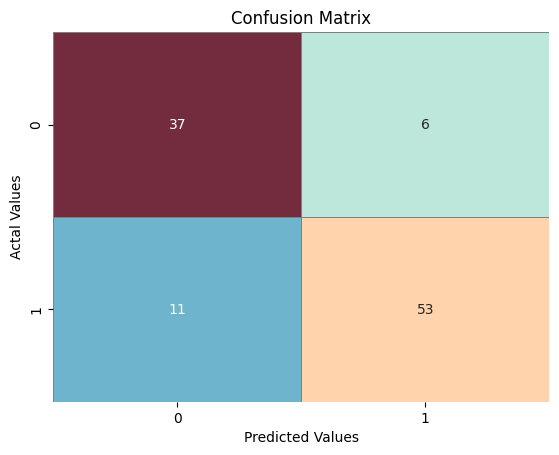

In [302]:
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'icefire', linewidths= 0.5, linecolor= 'grey')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

In [303]:
print("Accuracy Score = {}".format(round(accuracy_score(y_test,pred),5)))

Accuracy Score = 0.84112
